In [147]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

In [149]:
%autoreload
from pipeline import Pipeline, BuilingIdsEnum
from utils import plot_energy_usage, ColumnParam
pipe = Pipeline()

In [150]:
main_df = pipe.get_data(BuilingIdsEnum.MAIN)
print("columns:", list(main_df.columns))
# ['timestamp', 'value_import', 'property_id', 'building', 'area', 'value_export', 'solar_consumption', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']

columns: ['timestamp', 'value_import', 'value_export', 'solar_consumption', 'net_consumption', 'net_consumption_per_sqm', 'predicted_consumption', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation', 'spot_price_nok']


In [151]:
main_df 

,timestamp,value_import,value_export,solar_consumption,net_consumption,net_consumption_per_sqm,predicted_consumption,building,property_id,area,temperature,wind_speed,wind_direction,cloud_fraction,precipitation,spot_price_nok
0,2023-07-01 00:00:00,27.5,0.0,0.000000,27.500000,0.022936,40.197586,main building,10724,1199,13.6,1.6,251.5,0.5,0.0,1.137242
1,2023-07-01 01:00:00,27.1,0.0,0.000000,27.100000,0.022602,39.341590,main building,10724,1199,13.2,2.0,246.5,0.4,0.0,1.075944
2,2023-07-01 02:00:00,26.8,0.0,0.000000,26.800000,0.022352,26.925701,main building,10724,1199,12.3,1.6,260.4,0.3,0.0,0.970594
3,2023-07-01 03:00:00,25.9,0.0,0.000000,25.900000,0.021601,25.161346,main building,10724,1199,11.9,0.6,285.0,0.9,0.0,0.908986
4,2023-07-01 04:00:00,26.4,0.0,0.000000,26.400000,0.022018,28.009222,main building,10724,1199,11.9,0.2,295.8,0.8,0.0,0.765118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10338,2024-09-03 18:00:00,37.4,0.0,0.184148,37.584148,0.031346,42.476562,main building,10724,1199,17.8,2.5,140.8,1.0,1.4,0.662337
10339,2024-09-03 19:00:00,29.2,0.0,0.157455,29.357455,0.024485,41.309350,main building,10724,1199,17.8,1.8,112.6,1.0,2.5,0.664547
10340,2024-09-03 20:00:00,28.9,0.0,0.017115,28.917115,0.024118,41.650190,main building,10724,1199,17.7,1.1,75.1,1.0,2.6,0.663151
10341,2024-09-03 21:00:00,35.0,0.0,0.018016,35.018016,0.029206,40.362083,main building,10724,1199,18.0,3.4,111.0,1.0,2.9,0.662221


In [152]:
merged_df, cols =pipe.select_and_merge_datasets(["net_consumption"], periode="d")

merged_df = merged_df.iloc[1:-1]
plot_energy_usage(merged_df, cols,
                    titel="Daily Energy Usage Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [153]:
merged_df, cols =pipe.select_and_merge_datasets(["net_consumption"], periode="w")
merged_df = merged_df.iloc[1:-1]
    
plot_energy_usage(merged_df, cols,
                    titel="Weekly Energy Consumption Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    # dark_mode=True,
                    )

In [154]:
merged_df, cols =pipe.select_and_merge_datasets(["net_consumption"], periode="m")
merged_df = merged_df.iloc[1:-1]
    
plot_energy_usage(merged_df, cols,
                    titel="monthly Energy Usage Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [155]:
merged_df, cols = pipe.select_and_merge_datasets(cols=['net_consumption_per_sqm'], periode="d")
    
plot_energy_usage(merged_df, cols,
                    titel="Daily Energy Usage Comparison per sqm",
                    yaxis_title="Energy [kWh per sqm]",
                    tozeroy=False,
                    dark_mode=True,
                    )

## Renewable Energy Impact

In [156]:
daily_main = pipe.get_weekly_consumption(BuilingIdsEnum.MAIN)
plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    ColumnParam("value_export", "Energy Export"),
    ColumnParam("solar_consumption", "Solar Consumption"),
    # net
    ColumnParam("net_consumption", "Net Consumption"),
]
# trim
daily_main = daily_main.iloc[1:-1]
plot_energy_usage(daily_main, plot_cols,
                  titel="Energy Usage Main Building",
                  yaxis_title="Energy [kWh]",
                  tozeroy=False,
                  )

In [157]:
# make a grap with 
daily_main = pipe.get_weekly_consumption(BuilingIdsEnum.MAIN)
# trim
daily_main = daily_main.iloc[1:-1]
# print net consumption and import together with torzey
plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    ColumnParam("net_consumption", "Net Consumption"),
]
plot_energy_usage(daily_main, plot_cols,
                    titel="Energy Consumption vs Import For The Main Building",
                    yaxis_title="Energy [kWh]",
                    tozeroy=True,
                    )

In [158]:
# get main building data
main_df = pipe.get_data(BuilingIdsEnum.MAIN)
# cols: spot_price_nok, solar_consumption
# calculate the value of the solar energy
# plot the solar value
# aggregated by day
main_df["solar_value"] = main_df["solar_consumption"] * main_df["spot_price_nok"]
# set index
main_df.set_index("timestamp", inplace=True)
monthly_solar_money = main_df.resample("ME").sum()
monthly_solar_money.reset_index(inplace=True)

plot_cols =[
    ColumnParam("solar_value", "Solar Value"),
]
plot_energy_usage(monthly_solar_money, plot_cols,
                    titel="Money saved by solar panels",
                    yaxis_title="Value [NOK]",
                    tozeroy=False,
                    )
# print the avg money saved each month
print(f"average money saved by solar panels each month: {monthly_solar_money['solar_value'].mean():.2f} NOK")

# two desimals
print(f"total money saved by solar panels: {monthly_solar_money['solar_value'].sum():.2f} NOK")



average money saved by solar panels each month: 2508.04 NOK
total money saved by solar panels: 37620.58 NOK


### Prediction interpretation
- 

## Feature Analysis
Objective of the projects is to map out the advantigaed of the main building's energy consumtion vs the rest of the buildings.
Main building data columns: ['timestamp', 'value_import', 'value_export', 'solar_consumption', 'net_consumption', 'net_consumption_per_sqm', 'predicted_consumption', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']

Builing A,B,C ['timestamp', 'value_import', 'net_consumption', 'net_consumption_per_sqm', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']

example use:

monthly_a = pipe.get_monthly_consumption(BuilingIdsEnum.A)

for eks
daily_main = pipe.get_daily_consumption(BuilingIdsEnum.MAIN)

plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    # ColumnParam("net_consumption", "Net Consumption"),
    ColumnParam("predicted_consumption", "Predicted Consumption"),
]
plot_energy_usage(daily_main, plot_cols,
                  titel="Energy Usage actual vs predicted",
                  yaxis_title="Energy [kWh]",
                  tozeroy=True,
                  )

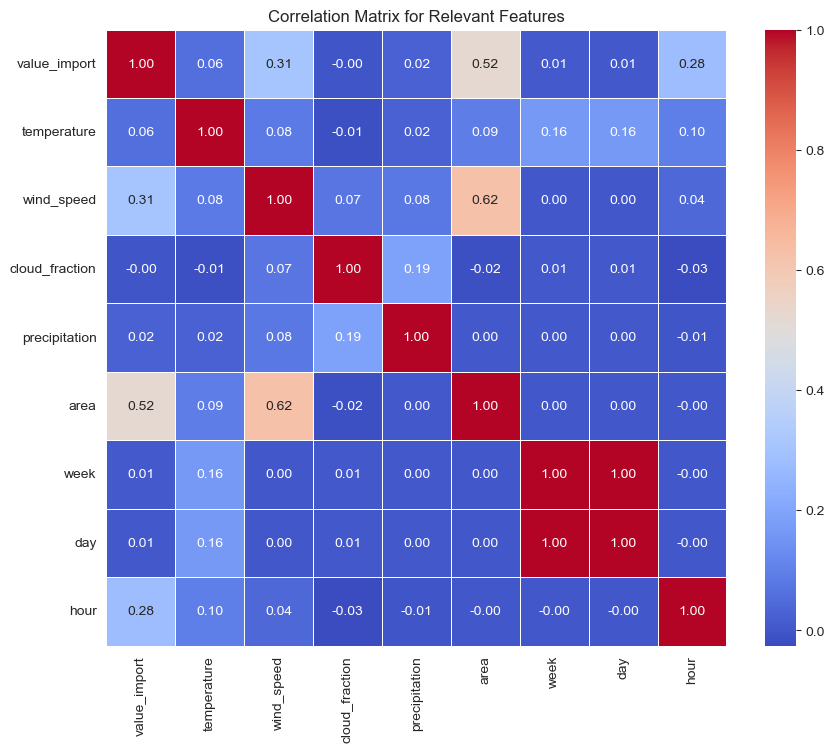

In [159]:
df_a = pipe.get_data(BuilingIdsEnum.A)
df_b = pipe.get_data(BuilingIdsEnum.B)
df_c = pipe.get_data(BuilingIdsEnum.C)

merged_df = pd.concat([df_a, df_b, df_c])
# Add 'week' and 'day' columns
merged_df['hour'] = merged_df['timestamp'].dt.hour
merged_df['day'] = merged_df['timestamp'].dt.dayofyear
merged_df['week'] = merged_df['timestamp'].dt.isocalendar().week

relevant_columns = [
    'value_import', 
    'temperature', 'wind_speed', 
    'cloud_fraction', 'precipitation',
    'area', "week", "day", "hour"
]
df_corr = merged_df[relevant_columns]

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Relevant Features')
plt.show()


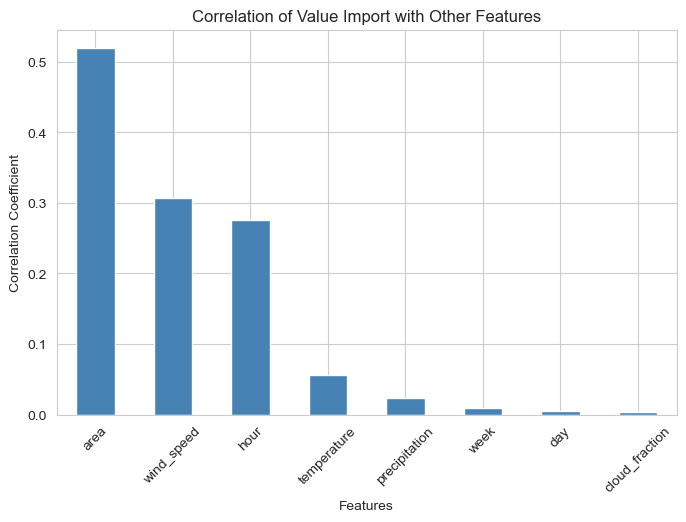

In [160]:
# Extract correlations of 'value_import' with other features and take the absolute values
value_import_corr = corr_matrix['value_import'].abs().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
value_import_corr.drop('value_import').plot(kind='bar', color='steelblue')
plt.title('Correlation of Value Import with Other Features')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.savefig(f'images/correlation_bar_plot_{"all_datasets"}.png')
plt.show()



### key takeaways:

- **Building Size (Area) and Energy Import:** The correlation matrix shows a strong relationship between `area` and `value_import`, indicating that larger buildings generally require more energy. This is expected, as larger spaces have greater heating, cooling, and operational demands.
- **Wind Speed Influence:** The moderate positive correlation between `wind_speed` and `value_import` suggests that wind may have a tangible impact on energy use. This seems odd and should be investigated further.

- **Time-Based Influence:** The relatively weak correlation between `value_import` and time-based features (week, day) suggests minimal impact, while the moderate correlation with `hour` indicates potential fluctuations in energy consumption over the course of a day.

- **Wind and Area Interaction:** The correlation between `wind_speed` and `area` does not make sense, even though it appears to be strong.

### Next up:

- **Further Analysis on Hourly Patterns:** Since there is a noticeable correlation with `hour`, it may be valuable to explore energy consumption patterns across different hours of the day to identify peak usage periods.
- **Investigate the correlation of feature for the different buildings:** The correlation matrix should be analyzed for each building to identify unique relationships and potential areas for optimization.

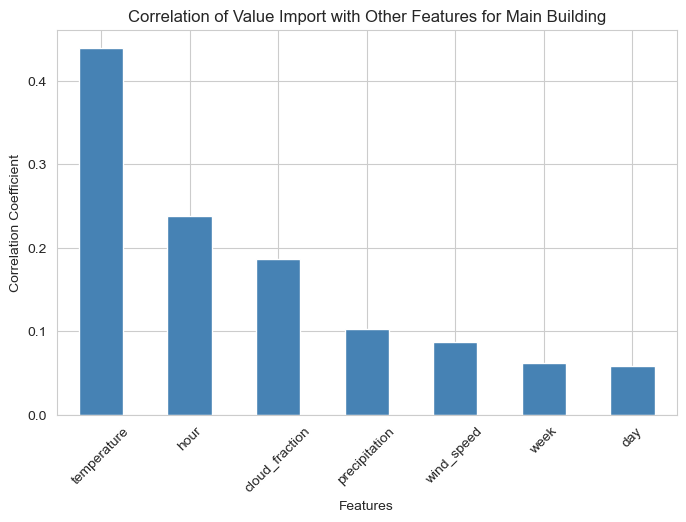

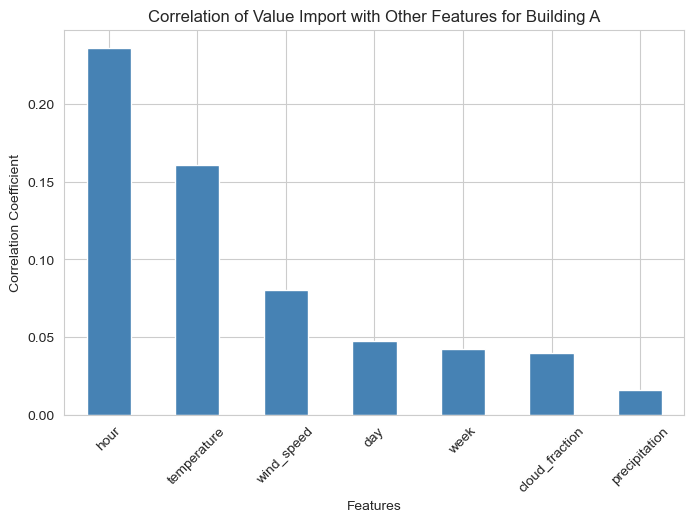

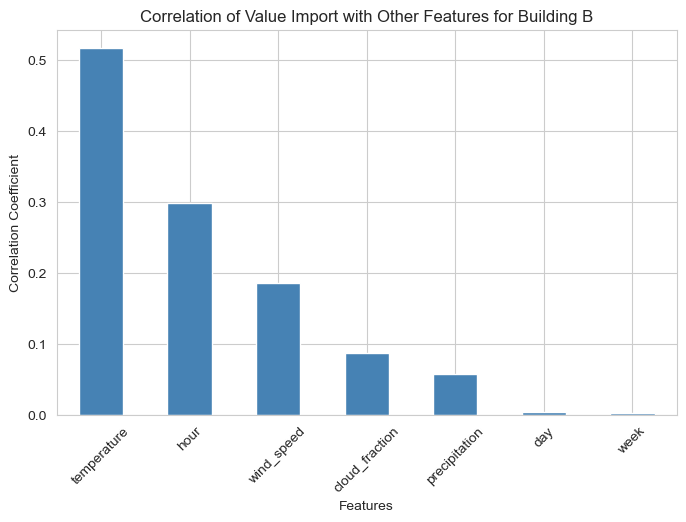

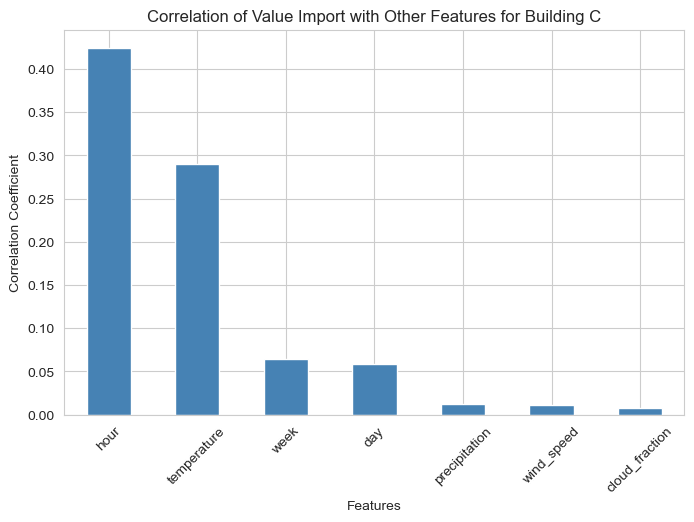

In [161]:
df_a = pipe.get_data(BuilingIdsEnum.A)
df_b = pipe.get_data(BuilingIdsEnum.B)
df_c = pipe.get_data(BuilingIdsEnum.C)
main_df = pipe.get_data(BuilingIdsEnum.MAIN)
dataframes = {
    'Main Building': main_df,
    'Building A': df_a,
    'Building B': df_b,
    'Building C': df_c,
}

# Relevant columns for correlation analysis
relevant_columns = [
    'value_import', 
    'temperature', 'wind_speed', 
    'cloud_fraction', 'precipitation',
]

# Loop through each dataframe and create correlation matrix
for name, df in dataframes.items():
    # Ensure 'timestamp' is in datetime format
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Add 'hour', 'day', and 'week' columns
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.dayofyear
    df['week'] = df['timestamp'].dt.isocalendar().week

    # Select relevant columns for correlation
    df_relevant = df[relevant_columns + ['hour', 'day', 'week']]

    # Compute the correlation matrix
    corr_matrix = df_relevant.corr()
    # Extract correlations of 'value_import' with other features and take the absolute values
    value_import_corr = corr_matrix['value_import'].abs().sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    value_import_corr.drop('value_import').plot(kind='bar', color='steelblue')
    plt.title('Correlation of Value Import with Other Features for ' + name)
    plt.ylabel('Correlation Coefficient')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.savefig(f'images/correlation_bar_plot_{name}.png')
    plt.show()


    # # Plot the heatmap
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    # plt.title(f'Correlation Matrix for {name}')
    # plt.show()


### Correlation Matrix Interpretation
The hour and temperature are the features most relevant for the energy consumption of the buildings. 
However the buildings have different correlations with the features. The A building has the least correlation with the features. The B building has the correlation most similar to the main building. The C building has the most correlation with hourly usage while builing B has the highest correlation with temperature.

Perhaps the data from the B building is best for predicting the main building's energy consumption. Maybe it should be weighted more?


## Anomaly Detection

In [162]:
daily_a = pipe.get_daily_consumption(BuilingIdsEnum.A)
# select juli 2024
daily_a_selected = daily_a[(daily_a['timestamp'] >= '2024-01-01') & (daily_a['timestamp'] < '2024-08-01')]
plot_cols =[
    ColumnParam("value_import", "Energy Import"),
]
plot_energy_usage(daily_a_selected, plot_cols,
                  titel="Daily Energy Usage A Building",
                  yaxis_title="Energy [kWh]",
                  tozeroy=False,
                  )

### Anomaly Detection Results
There seems to be something off in the start of juli 2024. This could be due to a data error or a real anomaly. We want to avoid using this data when training the model.

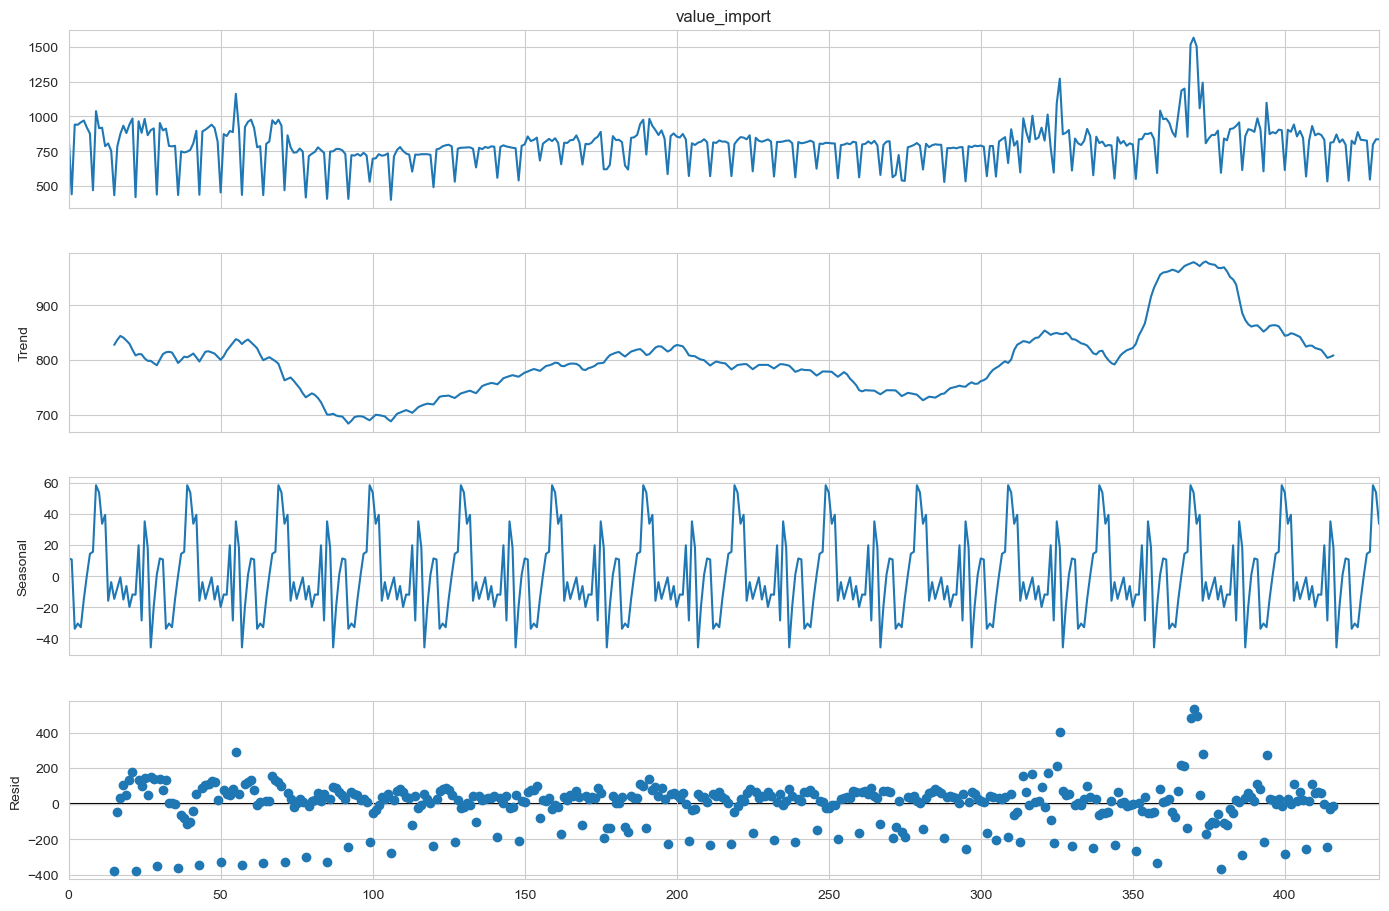

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(daily_a['value_import'], model='additive', period=30)  # Assuming monthly seasonality

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()


In [164]:
import numpy as np
from scipy import stats

# Calculate Z-scores
daily_a['z_score'] = np.abs(stats.zscore(daily_a['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_a['anomaly_z'] = daily_a['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_a['anomaly_z'].sum()}")

# show anonomalies
anonomalies_df = daily_a[daily_a['anomaly_z']]
anonomalies_df



Number of anomalies detected by Z-Score: 5


,timestamp,value_import,net_consumption,net_consumption_per_sqm,building,property_id,area,temperature,wind_speed,wind_direction,cloud_fraction,precipitation,spot_price_nok,z_score,anomaly_z
326,2024-05-22,1271.2,1271.2,1.089289,building A,10703,1167,17.604167,2.458333,278.8,0.391667,0.000000,0.379726,3.247965,True
369,2024-07-04,1515.8,1515.8,1.298886,building A,10703,1167,12.295833,2.166667,189.4,0.762500,0.341667,0.430382,4.931505,True
370,2024-07-05,1565.4,1565.4,1.341388,building A,10703,1167,11.483333,1.166667,104.0,0.612500,0.000000,0.347707,5.272894,True
371,2024-07-06,1503.8,1503.8,1.288603,building A,10703,1167,12.575000,1.387500,302.9,0.783333,0.150000,0.533127,4.848911,True
373,2024-07-08,1242.0,1242.0,1.064267,building A,10703,1167,15.079167,1.545833,152.7,0.279167,0.000000,0.496169,3.046986,True


Lets look at dataset b, c and main  as well and identify if the anomaly is present in all datasets defined by the z-score.

In [165]:
daily_main_anomalies = pipe.get_daily_consumption(BuilingIdsEnum.MAIN)
daily_main_anomalies['z_score'] = np.abs(stats.zscore(daily_main_anomalies['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_main_anomalies['anomaly_z'] = daily_main_anomalies['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_main_anomalies['anomaly_z'].sum()}")



Number of anomalies detected by Z-Score: 0


In [166]:
daily_b_anomalies = pipe.get_daily_consumption(BuilingIdsEnum.B)
daily_b_anomalies['z_score'] = np.abs(stats.zscore(daily_b_anomalies['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_b_anomalies['anomaly_z'] = daily_b_anomalies['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_b_anomalies['anomaly_z'].sum()}")
anonomalies_df = daily_b_anomalies[daily_b_anomalies['anomaly_z']]
anonomalies_df



Number of anomalies detected by Z-Score: 5


,timestamp,value_import,net_consumption,net_consumption_per_sqm,building,property_id,area,temperature,wind_speed,wind_direction,cloud_fraction,precipitation,spot_price_nok,z_score,anomaly_z
188,2024-01-05,1102.48,1102.48,1.006831,building B,4462,1095,-25.829167,0.391667,163.1,0.087500,0.0,1.004801,3.352499,True
189,2024-01-06,1123.76,1123.76,1.026265,building B,4462,1095,-27.120833,0.620833,169.5,0.062500,0.0,0.959815,3.520223,True
190,2024-01-07,1075.44,1075.44,0.982137,building B,4462,1095,-24.754167,0.400000,196.1,0.000000,0.0,0.971160,3.139376,True
191,2024-01-08,1116.40,1116.40,1.019543,building B,4462,1095,-23.158333,0.454167,62.4,0.395833,0.0,0.980968,3.462213,True
198,2024-01-15,1584.56,1584.56,1.447087,building B,4462,1095,-13.891667,0.887500,2.9,0.270833,0.0,0.785025,7.152142,True


In [167]:
daily_c_anomalies = pipe.get_daily_consumption(BuilingIdsEnum.C)
daily_c_anomalies['z_score'] = np.abs(stats.zscore(daily_c_anomalies['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_c_anomalies['anomaly_z'] = daily_c_anomalies['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_c_anomalies['anomaly_z'].sum()}")



Number of anomalies detected by Z-Score: 0


### Model development and evaluation

In [168]:

plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    # ColumnParam("net_consumption", "Net Consumption"),
    ColumnParam("predicted_consumption", "Predicted Consumption"),
]
daily_main = pipe.get_weekly_consumption(BuilingIdsEnum.MAIN)
# trim
daily_main = daily_main.iloc[1:-1]
plot_energy_usage(daily_main, plot_cols,
                  titel="Energy Usage actual vs predicted",
                  yaxis_title="Energy [kWh]",
                  tozeroy=True,
                  )

## Futher analysis points
- **sum up energy savings:** The energy savings for each building should be calculated and compared to identify the most efficient building.
- **Try to figure out how much money they save:** The energy savings can be converted into monetary savings based on the energy costs to provide a more tangible understanding of the benefits.

- **KPIs for energy efficiency:** Key performance indicators (KPIs) can be established to monitor and evaluate the energy efficiency of each building over time. These KPIs can help identify areas for improvement and track progress towards sustainability goals.

- **Analysis of peak energy consumption:** Identifying peak energy consumption periods can help optimize energy usage and reduce costs. Strategies such as load shifting, demand response, and energy storage can be implemented to manage peak demand effectively.

In [169]:
# 
import_df, column_params = pipe.select_and_merge_datasets(["value_import"], periode="h")
import_df.set_index('timestamp', inplace=True)
# Resample and aggregate
monthly_imports = import_df.resample('ME').max()

# can you do avg for solar_consumption column in the resample function?
monthly_imports.reset_index(inplace=True)

plot_energy_usage(monthly_imports, column_params,
                    titel="Monthly Max Energy Import Comparison per Hour",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )
print([column.name for column in column_params])

['main building', 'building a', 'building b', 'building c']


In [170]:
# 
import_df = pipe.get_data(BuilingIdsEnum.MAIN)
import_df = import_df[["timestamp","value_import", "solar_consumption"]]
import_df
import_df.set_index('timestamp', inplace=True)
# Resample and aggregate
monthly_imports = import_df.resample('ME').agg({
    'value_import': 'max',
    'solar_consumption': 'mean'
})
monthly_imports.reset_index(inplace=True)

# can you do avg for solar_consumption column in the resample function?
column_params= [
    ColumnParam("value_import", "peak consumption"),
    ColumnParam("solar_consumption", "solar consumption avg.")
]
plot_energy_usage(monthly_imports, column_params,
                    titel="Monthly Max Energy Import Comparison per Hour",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )


### Analyse av peaks
Siden det er lite størm produksjon om vinteren er det vansklig å redusere peaks med solenergi. Det er derfor viktig å redusere peaks ved å redusere forbruket. Siden bygningen er sensitiv til temperaturen ute, kan det være lurt å isolere bygningen bedre. Dette er ikke en del av ANEO sine tjenester.

Vi ser at bygning b og main har peak i januar. Dette kan være fordi det er kaldt ute og bygningen bruker mye energi til oppvarming. Bygning A har peak i juli. Dette kan være fordi det er varmt ute og bygningen bruker mye energi til kjøling.

For bygninger som A, med peak i juli, kan det være lurt å installere solcellepaneler for å redusere det maximal energiforbruket. Dette er en fordel ANEO kan tilby.

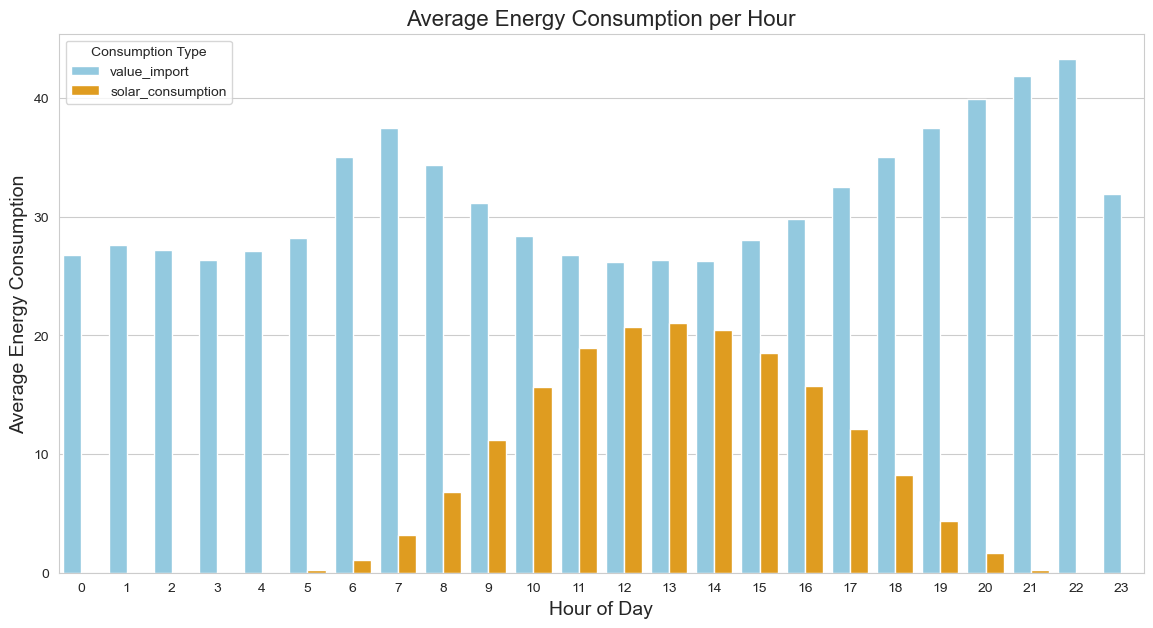

In [171]:
main_hourly = pipe.get_data(BuilingIdsEnum.MAIN)
# jeg vil se på energiforbruekt fordelt på time. Kan jeg ha en søyle for for hver kolonner per time?
main_hourly = main_hourly[["timestamp","value_import", "solar_consumption"]] 
main_hourly.set_index('timestamp', inplace=True)
# jeg ønsker å grupere på time i døgnet og avg for value_import og solar_consumption
main_hourly = main_hourly.groupby(main_hourly.index.hour).mean()
main_hourly.reset_index(inplace=True)
# main_hourly

# Melt the DataFrame to long format for seaborn
main_hourly_melted = main_hourly.melt(id_vars='timestamp', 
                                     value_vars=['value_import', 'solar_consumption'],
                                     var_name='Consumption Type',
                                     value_name='Energy')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='timestamp', y='Energy', hue='Consumption Type', data=main_hourly_melted, palette=['skyblue', 'orange'])

# Add labels and title
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.title('Average Energy Consumption per Hour', fontsize=16)
plt.legend(title='Consumption Type')

plt.show()

### Analyse av Peaks
Vi ser det er størt forbruk utenom den tiden på døgnet det er solproduksjon. Trolig vil peak forbruk være på kvelden eller om morningen. Siden det ikke er sol på denne tiden, vil solcellepaneler ikke kunne redusere peak forbruket alene. Imidlertid i kombinasjon med batterier kan reduksjon av peak forbruket være mulig. Imidlertid vil dette trolig kun gi resultater om sommeren. 

- **Videre analyse** se på hvor mye solcell kan redusere peaks i sommermånedene.
